In [1]:
import sys
!{sys.executable} -m pip install google_images_download pytesseract opencv-python

    100% |████████████████████████████████| 174kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 25.0MB 464kB/s ta 0:00:011   43% |██████████████                  | 11.0MB 3.6MB/s eta 0:00:04    62% |███████████████████▉            | 15.5MB 6.3MB/s eta 0:00:02    65% |█████████████████████▏          | 16.5MB 5.0MB/s eta 0:00:02    90% |█████████████████████████████   | 22.6MB 6.5MB/s eta 0:00:01    95% |██████████████████████████████▋ | 23.9MB 6.7MB/s eta 0:00:01    99% |████████████████████████████████| 25.0MB 7.9MB/s eta 0:00:01
    100% |████████████████████████████████| 911kB 19.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for google-images-download ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
  Running setup.py bdist_wheel for pytesseract ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/df/0f/58/4577e860a694ad2a77cddf2f17bb77e9d21ad7f0758a4bc6f9
Successfully built google-

In [14]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

def get_image(kw): 
    arguments = {"keywords": kw, "limit": 1}
    absolute_image_paths = response.download(arguments)
    return absolute_image_paths

import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract

def grid_display(list_of_images, list_of_titles=[], no_of_columns=4, figsize=(20,3)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        
        
        
        img = cv.imread(list_of_images[i])
        rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        plt.imshow(rgb_img)
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
            
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))            
            
import requests, json

def random_user_reccom():
    url = 'http://docker.for.mac.localhost:8080/user/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))
    return data
    
def display_user_history(data):
    history_titles = list(data.get("history")[:12])
    with suppress_stdout():
        history_image_links = list(map(lambda x: next(iter(next(iter(get_image(x).values())))), history_titles))
  
    printmd('**User {} history (top 12):**'.format(data.get("id")))
    grid_display(history_image_links, history_titles) 
    
def display_user_reccom(data):
    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
    
    printmd('**Recommendations for user {}:**'.format(data.get("id")))
    grid_display(image_links, titles) 


from IPython.core.display import Image, display
def random_item_reccom():
    url = 'http://docker.for.mac.localhost:8080/item/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))

    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
        item_url = next(iter(next(iter(get_image(data.get("movie")).values()))))
        display(Image(item_url, width=100, unconfined=True))
    
    printmd('**Recommendations for {}:**'.format(data.get("movie")))
    grid_display(image_links, titles) 


In [33]:
user_data = random_user_reccom()

**Response:**

{
    "history": [
        "Gandhi (1982)",
        "Brave (2012)",
        "Wreck-It Ralph (2012)",
        "The Jungle Book (2016)",
        "Truman Show, The (1998)",
        "Hugo (2011)",
        "Avengers, The (2012)",
        "Incredibles, The (2004)",
        "Tangled (2010)",
        "Arrival (2016)",
        "Victor/Victoria (1982)",
        "Toy Story 3 (2010)",
        "Pleasantville (1998)",
        "Rogue One: A Star Wars Story (2016)",
        "Toy Story (1995)",
        "Coraline (2009)",
        "Star Wars: Episode VII - The Force Awakens (2015)",
        "King's Speech, The (2010)",
        "Inception (2010)",
        "Wonder Woman (2017)",
        "Big Hero 6 (2014)",
        "Zootopia (2016)",
        "Ratatouille (2007)",
        "Finding Nemo (2003)",
        "Inside Out (2015)",
        "Mrs. Doubtfire (1993)",
        "Doctor Strange (2016)",
        "The Lego Movie (2014)",
        "Lion King, The (1994)",
        "Frozen (2013)"
    ],
    "id": 252,
    "scor

**User 252 history (top 12):**

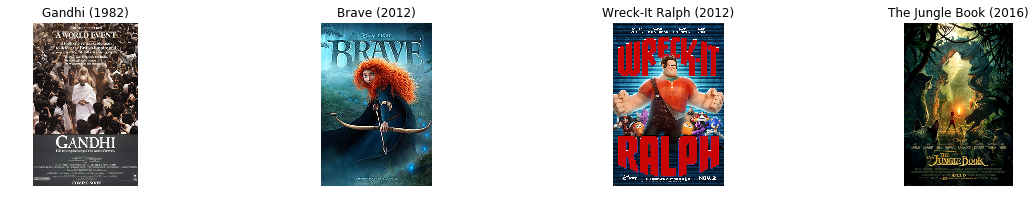

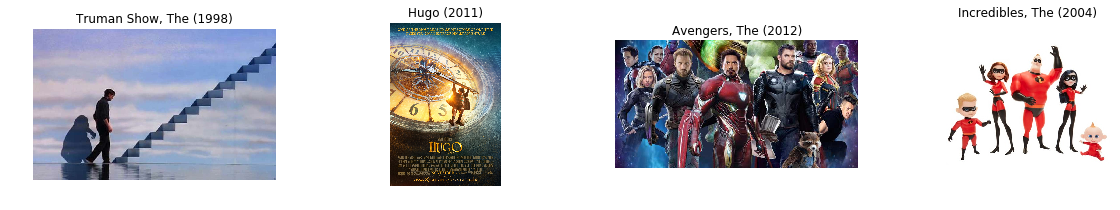

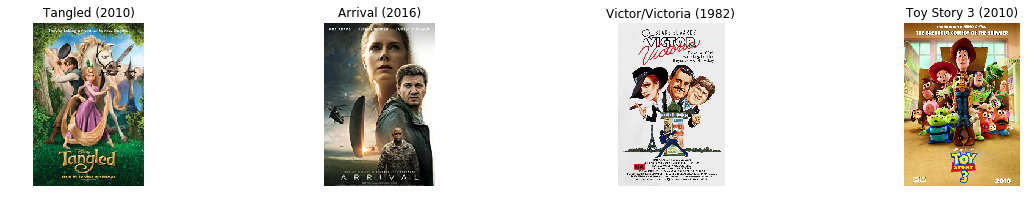

In [34]:
display_user_history(user_data)

**Recommendations for user 252:**

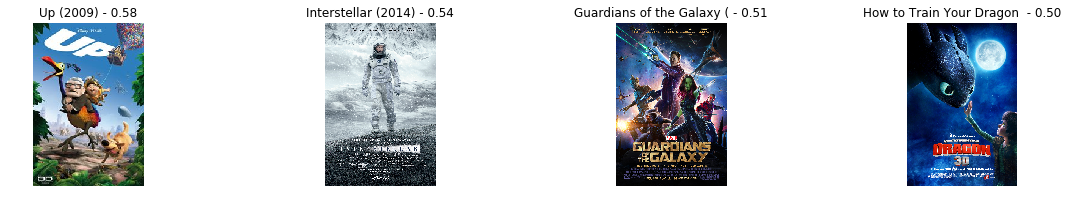

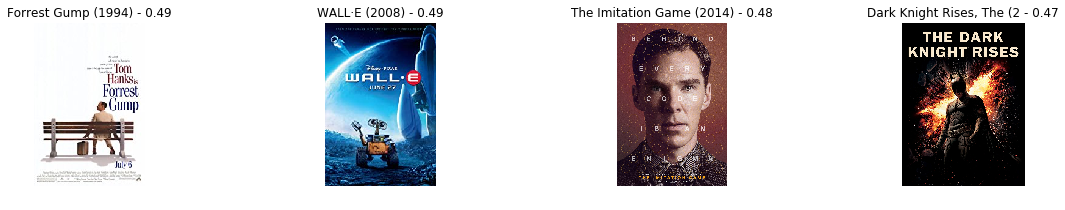

In [35]:
display_user_reccom(user_data)

**Response:**

{
    "history": [],
    "id": 99112,
    "movie": "Jack Reacher (2012)",
    "scores": [
        {
            "id": 119145,
            "score": 0.21579395234584808,
            "title": "Kingsman: The Secret Service (2015)"
        },
        {
            "id": 122882,
            "score": 0.20780056715011597,
            "title": "Mad Max: Fury Road (2015)"
        },
        {
            "id": 122904,
            "score": 0.2043408453464508,
            "title": "Deadpool (2016)"
        },
        {
            "id": 112852,
            "score": 0.203118234872818,
            "title": "Guardians of the Galaxy (2014)"
        },
        {
            "id": 111759,
            "score": 0.20116031169891357,
            "title": "Edge of Tomorrow (2014)"
        },
        {
            "id": 122900,
            "score": 0.19934657216072083,
            "title": "Ant-Man (2015)"
        },
        {
            "id": 134130,
            "score": 0.1973160356283188,
            "tit

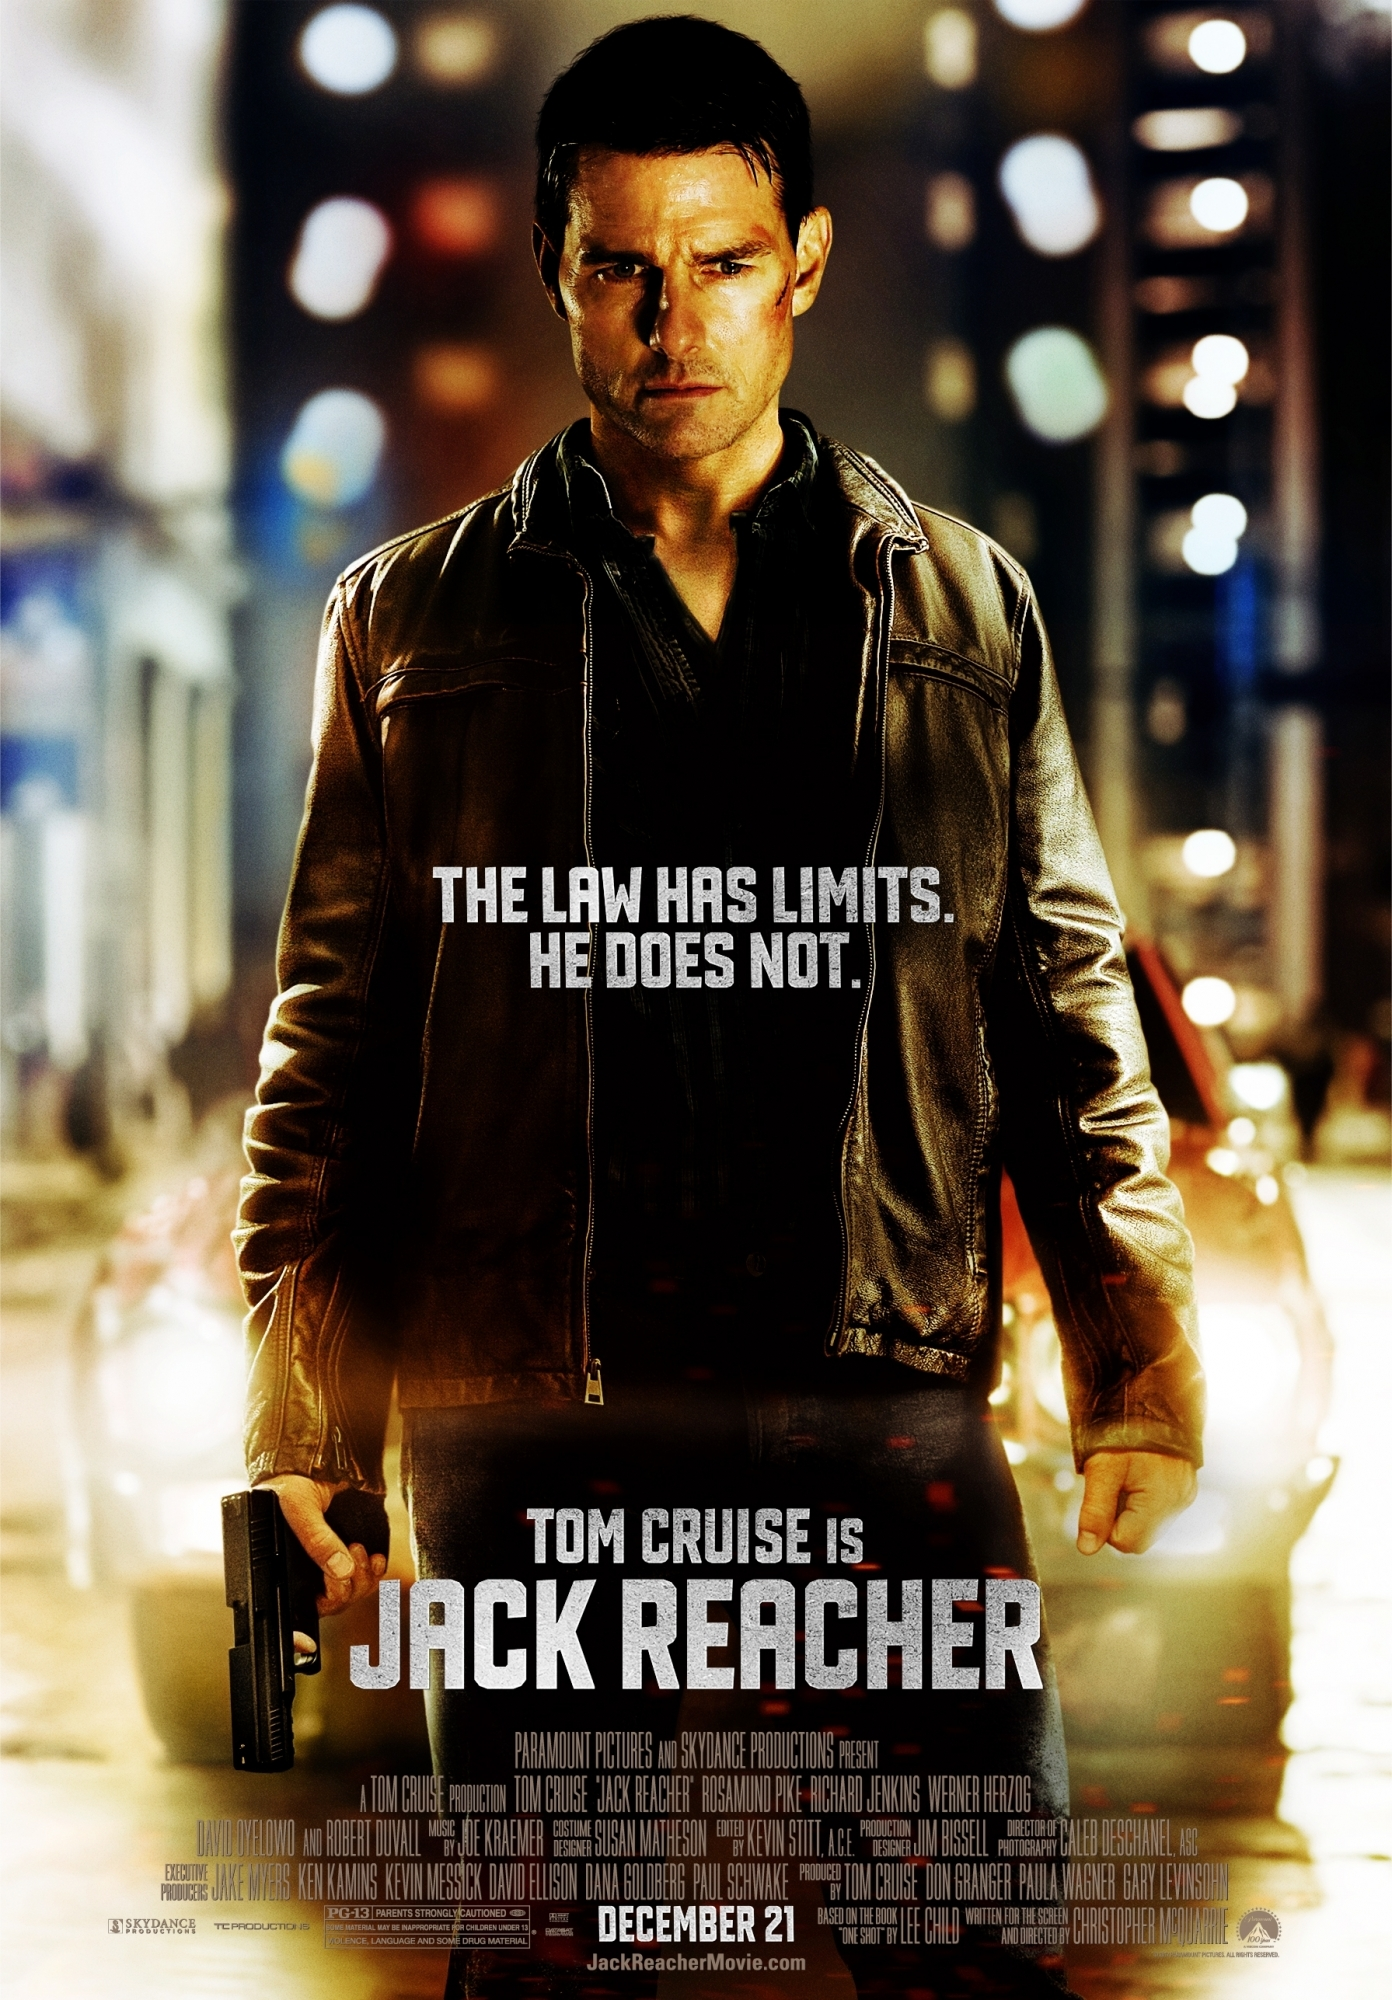

**Recommendations for Jack Reacher (2012):**

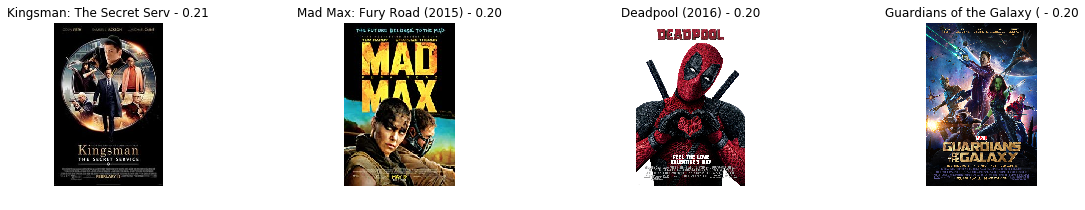

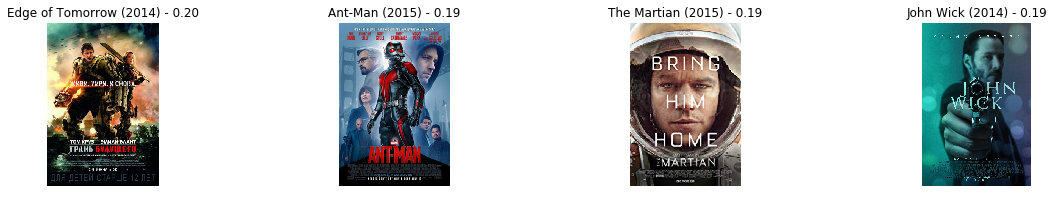

In [36]:
random_item_reccom()